<a href="https://colab.research.google.com/github/hhk54250/portfolio-management/blob/master/prj01(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yahoo-finance

In [2]:
pip install pandas_market_calendars

In [3]:
import pandas as pd
import pandas_market_calendars as mcal
import pandas_datareader.data as web
from pandas_datareader.data import DataReader
data1 = web.get_data_yahoo('TIF','08/31/2019','08/31/2020',interval='d') #Tiffany & Co.

Text(0.5, 1.0, 'LOGRETURN OF TIF')

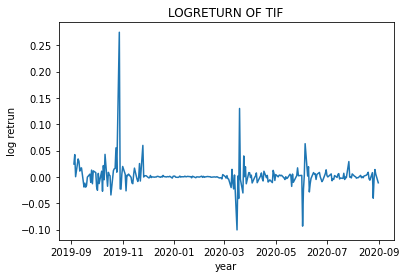

In [4]:
import numpy as np
import matplotlib.pyplot as plt
TIF = data1['Adj Close']
logTIF = np.log(TIF)-np.log(TIF.shift(1))
rTIF = TIF/TIF.shift(1)

plt.plot(logTIF)
plt.xlabel('year')
plt.ylabel('log retrun')
plt.title('LOGRETURN OF TIF')



Text(0.5, 1.0, 'RETURN OF TIF')

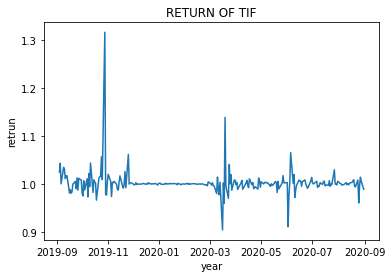

In [5]:
plt.plot(rTIF)
plt.xlabel('year')
plt.ylabel('retrun')
plt.title('RETURN OF TIF')

In [6]:
testlTIF=[]
for i in range(-4,0):
  testlTIF.append(logTIF[i])
logTIF4=logTIF[:-4]
testrTIF=[]
for i in range(-4,0):
  testrTIF.append(rTIF[i])
rTIF4=rTIF[:-4]

In [7]:
%cd~

!git clone https://github.com/hhk54250/portfolio-management.git 
pass

/root
fatal: destination path 'portfolio-management' already exists and is not an empty directory.


In [8]:
%cd portfolio-management
%ls

/root/portfolio-management
'exchange rate.csv'  'Libor rate.csv'   prj01.ipynb   README.md


In [9]:
Libor = pd.read_csv("Libor rate.csv")
Lrate1 = Libor['USDONTD156N']
Libor[1028:1289]
for i in range(len(Lrate1)):
    if (Lrate1[i] == '.'):
        Lrate1[i] = float(Lrate1[i-1])
Lrate=[]
for i in range(1028,1289):
  Lrate.append(Lrate1[i])




In [10]:
exrate2 = pd.read_csv("exchange rate.csv", skiprows=14)
exrate1 = exrate2['1.56']
exrate=[]
for i in range(9736,10049):
   exrate.append(exrate1[i])



In [11]:
testLrate=[]
for i in range(-4,0):
  testLrate.append(Lrate[i])
Lrate4=Lrate[:-4]
testexrate=[]
for i in range(-4,0):
  testexrate.append(exrate[i])
exrate4=exrate[:-4]
new_numbers = []
for n in testLrate:
  new_numbers.append(float(n));
testLrate=new_numbers
new_numbers = []
for n in Lrate4:
  new_numbers.append(float(n));
Lrate4=new_numbers

In [12]:
logTIF4[0]=0.024429
logTIF4
rTIF4[0]=1.024730
rTIF4

Date
2019-09-03    1.024730
2019-09-04    1.024730
2019-09-05    1.043298
2019-09-06    1.000340
2019-09-09    1.034686
                ...   
2020-08-19    1.008800
2020-08-20    0.996464
2020-08-21    0.993770
2020-08-24    1.008095
2020-08-25    0.960324
Name: Adj Close, Length: 248, dtype: float64

In [94]:
from scipy.optimize import fmin


In [14]:
pip install pyramid-arima

In [15]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr

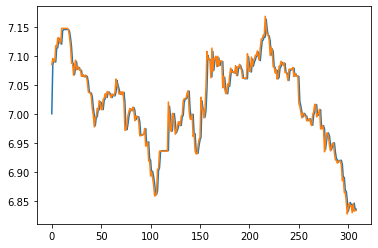

In [231]:
"ARIMA(1,0,1)-exrate"
train_y=exrate4
fittedmodel = auto_arima(train_y, start_p=1, start_q=1, max_p=1, max_q=1, d=0,max_order=None,
                         seasonal=False, m=1, test='adf', trace=False,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=False, information_criterion='bic', njob=-1)  # set to stepwise


plt.plot(fittedmodel.predict_in_sample())
plt.plot(exrate4)

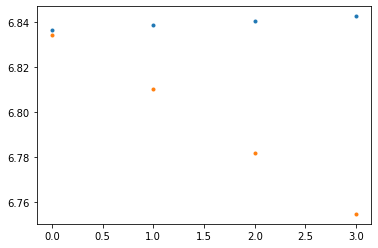

In [232]:
plt.plot(fittedmodel.predict(4),'.')
plt.plot(testexrate,'.')

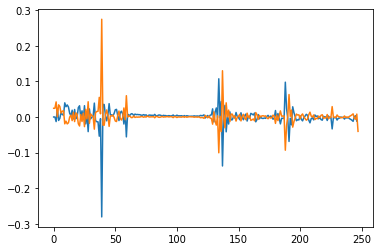

In [233]:
"ARIMA(1,1,1)-logTIF"
train_y=logTIF4
fittedmodel = auto_arima(train_y, start_p=1, start_q=1, max_p=1, max_q=1, d=1,max_order=None,
                         seasonal=False, m=1, test='adf', trace=False,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=False, information_criterion='bic', njob=-1)  # set to stepwise

phi=fittedmodel.arparams()
theta=fittedmodel.maparams()
miu=fittedmodel.params()[0]

t=[]
for i in range(len(logTIF4)):
  t.append(logTIF4[i])
plt.plot(fittedmodel.predict_in_sample())
plt.plot(t)

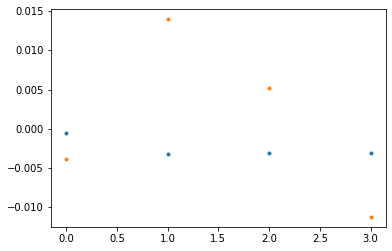

In [234]:
plt.plot(fittedmodel.predict(4),'.')
plt.plot(testlTIF,'.')

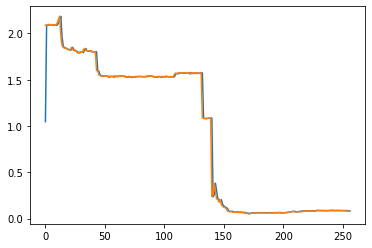

In [236]:
"ARIMA(1,0,1)-Lrate"
train_y=Lrate4
fittedmodel = auto_arima(train_y, start_p=1, start_q=1, max_p=1, max_q=1, d=0,max_order=None,
                         seasonal=False, m=1, test='adf', trace=False,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=False, information_criterion='bic', njob=-1)  # set to stepwise


plt.plot(fittedmodel.predict_in_sample())
plt.plot(Lrate4)

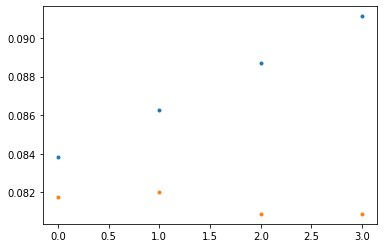

In [237]:
plt.plot(fittedmodel.predict(4),'.')
plt.plot(testLrate,'.')

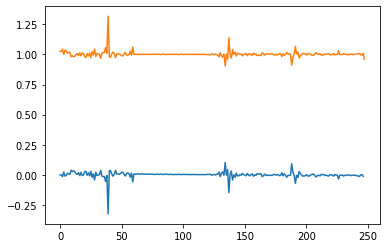

In [246]:
"ARIMA(1,1,1)-rTIF"
train_y=rTIF4
fittedmodel = auto_arima(train_y, start_p=1, start_q=1, max_p=1, max_q=1, d=1,max_order=None,
                         seasonal=False, m=1, test='adf', trace=False,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True,  # don't want convergence warnings
                         stepwise=False, information_criterion='bic', njob=-1)  # set to stepwise


t1=[]
for i in range(len(rTIF4)):
  t1.append(rTIF4[i])
plt.plot(fittedmodel.predict_in_sample())
plt.plot(t1)

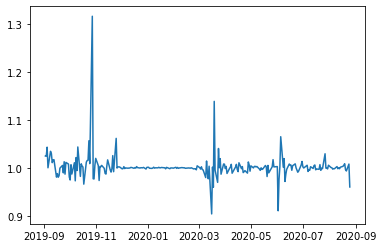